In [1]:
#Let's start with simple linear regression
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ex = pd.read_table('GPA_copy.txt',sep='\s+')

In [4]:
#This dataset contains 20 observations of two values. We will try to predict a students college GPA from a score 
#on a test that they take before entering college.
ex

,GPA,Score
0,3.1,5.5
1,2.3,4.8
2,3.0,4.7
3,1.9,3.9
4,2.5,4.5
5,3.7,6.2
6,3.4,6.0
7,2.6,5.2
8,2.8,4.7
9,1.6,4.3


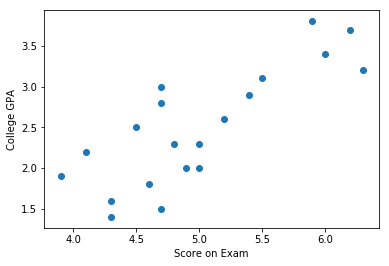

In [5]:
#Let's observe the data in a scatter plot before we begin
plt.scatter(ex.Score,ex.GPA)
plt.xlabel('Score on Exam')
plt.ylabel('College GPA')
plt.show()

In [6]:
#import the linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [19]:
#Investigate the shape of the data and reshape so that sklearn can use it properly
X = ex.Score
Y = ex.GPA
print X.shape, Y.shape

X = np.reshape(X,(20,1))
y = np.reshape(y,(20,1))

(20,) (20,)


/Users/cshartrand/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


In [24]:
#Fit the regression model and print the intercept and regression coefficient
lm.fit(X,y)
print lm.intercept_, lm.coef_

[-1.6995614] [[ 0.83991228]]


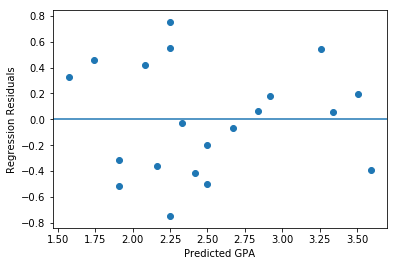

In [39]:
#Check out the residuals versus fitted values plot
pred = lm.predict(X)
res = y - pred
plt.scatter(pred,res)
plt.xlabel('Predicted GPA')
plt.ylabel('Regression Residuals')
plt.axhline(y=0)
plt.show()

In [173]:
#Regression Diagnostics with Multiple Linear Regression
gala = pd.read_csv('galapagos.csv', index_col=0)
gala.head()

#We would like to predict the number of species on each island based on corresponding information about that island
X = gala.drop(['Species','Endemics'],axis=1)
y = gala['Species']

lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
#Now lets find predicted values, residuals and standardized residuals
pred = lm.predict(X)
res = y - pred

Xmat = X.as_matrix()
nobs = Xmat.shape[0]
m = Xmat.shape[1]
ones = np.ones((30,1))
Xmat = np.hstack([ones,Xmat])

from numpy.linalg import inv
H = np.dot(np.dot(Xmat,inv(np.dot(Xmat.T,Xmat))),Xmat.T)

RSE = np.sqrt(np.sum(res**2)/(nobs-m-1))

std_res = res/(RSE*np.sqrt(1-np.diag(H)))

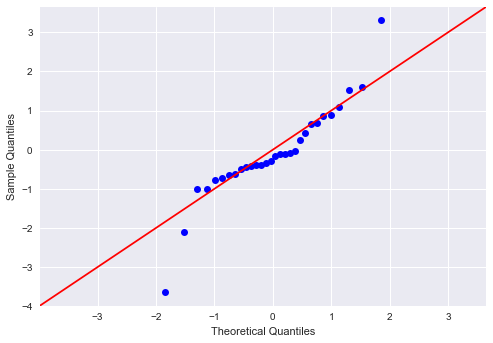

In [175]:
#And lets make a QQPlot
import statsmodels.api as sm
sm.qqplot(std_res,line='45')
plt.show()

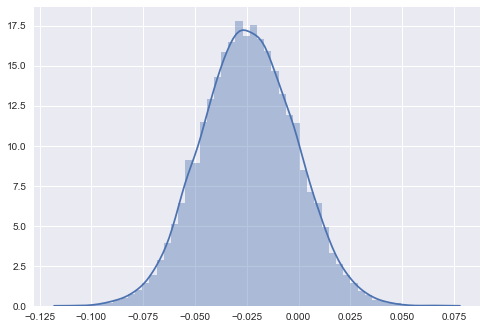

In [177]:
#Bootstrapping
#Let's do some simulations
beta = np.append(lm.intercept_,lm.coef_)
XTinv = inv(np.dot(Xmat.T,Xmat))

#Simulate some betas
nrows = 10000
ncols = 6
beta_sim = np.zeros((nrows,ncols))

for i in range(0,nrows):
    y_sim = np.dot(Xmat,beta) + np.random.normal(0,RSE,nobs)
    beta_sim[i,] = np.dot(np.dot(XTinv,Xmat.T),y_sim)

#Plot the density distribution for the coefficient of Area
import seaborn as sns
sns.distplot(beta_sim[:,1]);
#Here we can see the mean of the simulations seems to be slightly less than zero, as we would expect.

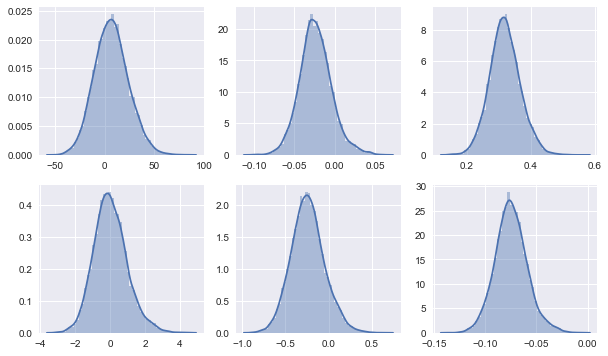

In [184]:
#Now for the actual bootstrapping part
beta_boot = np.zeros((nrows,ncols))
for i in range(0,nrows):
    error = np.random.choice(res,size = nobs, replace=True)
    y_boot = np.dot(Xmat,beta) + error
    beta_boot[i,] = np.dot(np.dot(XTinv,Xmat.T),y_boot)
#And some plots
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(10,6))
sns.distplot(beta_boot[:,0],ax=axes[0,0])
sns.distplot(beta_boot[:,1],ax=axes[0,1])
sns.distplot(beta_boot[:,2],ax=axes[0,2])
sns.distplot(beta_boot[:,3],ax=axes[1,0])
sns.distplot(beta_boot[:,4],ax=axes[1,1])
sns.distplot(beta_boot[:,5],ax=axes[1,2]);